In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import os
import random


import cv2

import torchvision

import matplotlib.pyplot as plt

torch.set_printoptions(linewidth= 120) # Display options for output
torch.set_grad_enabled(True) # Already on by default

In [2]:
def classwise_label_img(folder_loc, label):
    l= os.listdir(str(folder_loc))
    k=[]
    for i in range(len(l)):

        img= cv2.imread(str(folder_loc) + '/' + l[i], cv2.IMREAD_GRAYSCALE)
        img= cv2.resize(img, (64, 64))

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        img =torch.tensor(img, device=device).float()
        label= torch.tensor(label, device=device).float()
        k.append([label, img]) # not flattening img
    return k

In [3]:
def X_Y_data_seg(data):
    
    random.shuffle(data)

    Y=[]
    for i in range(len(data)):
        k= data[i][0]
        Y.append(k)
    Y= torch.LongTensor(Y)

    X=[]
    for i in range(len(data)):
        m= data[i][1]
        X.append(m)
    X= torch.stack(X)
    return X, Y

# Assigning Labels to classes;
* CNV - 0
* DME - 1
* DURSEN - 2
* NORMAL - 3

# Class wise label-img tensor(flattened) lists;

## For Train Data: 

In [4]:
# Locations of the folders
location_CNV= '../input/kermany2018/OCT2017 /train/CNV'
location_DME= '../input/kermany2018/OCT2017 /train/DME'
location_DRUSEN= '../input/kermany2018/OCT2017 /train/DRUSEN'
location_NOR= '../input/kermany2018/OCT2017 /train/NORMAL'

In [5]:
CNV_label_imgs_train= classwise_label_img(location_CNV, 0)

DME_label_imgs_train= classwise_label_img(location_DME,1)

DRUSEN_label_imgs_train =classwise_label_img(location_DRUSEN, 2)

NORMAL_label_imgs_train =classwise_label_img(location_NOR, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


In [6]:
train_data= CNV_label_imgs_train + DME_label_imgs_train + DRUSEN_label_imgs_train + NORMAL_label_imgs_train

X_train, Y_train= X_Y_data_seg(train_data)

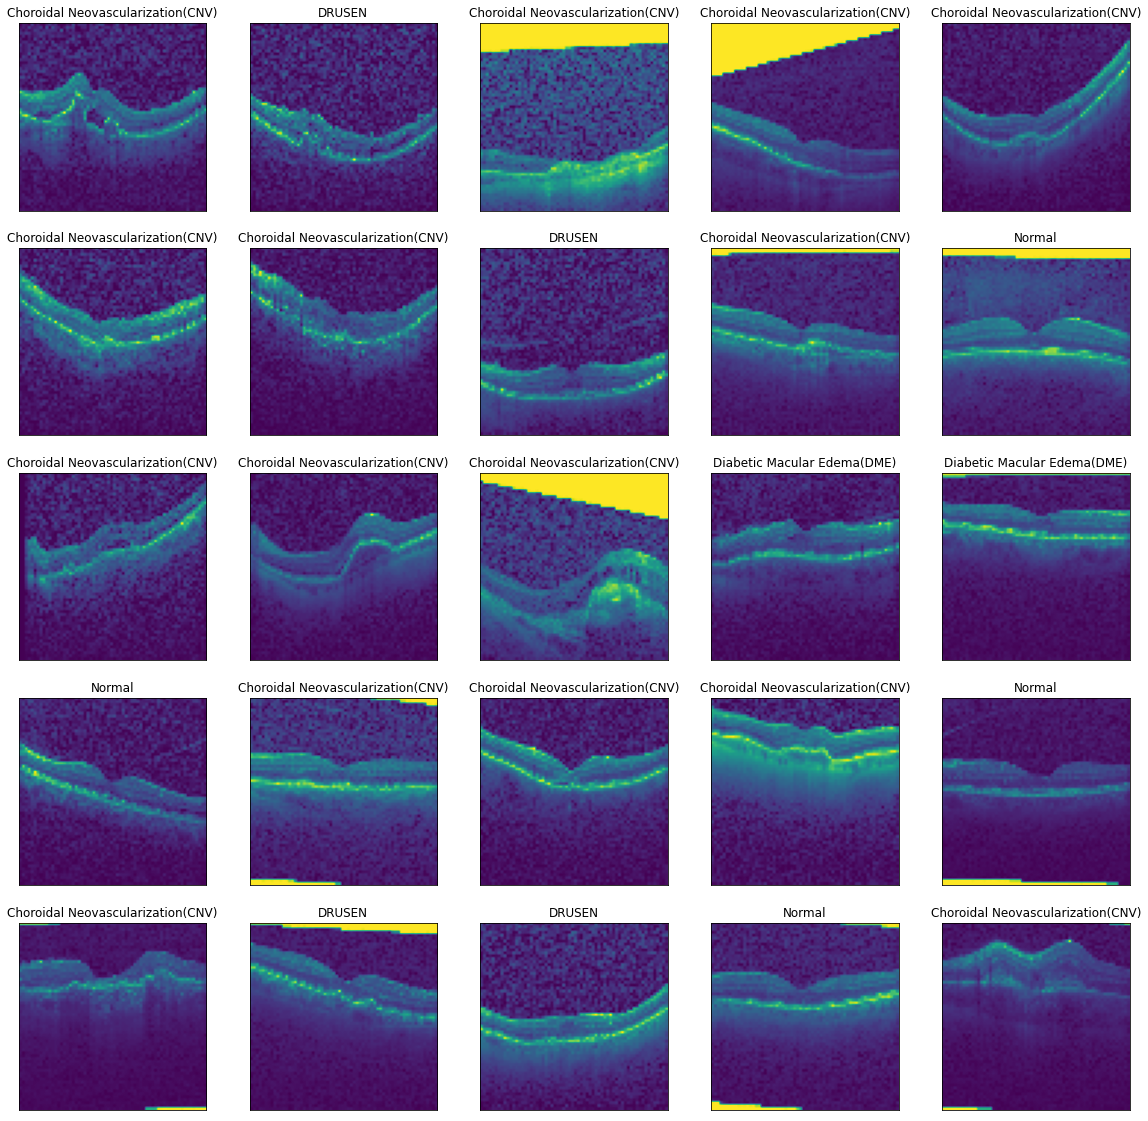

In [7]:
class_names = ['Choroidal Neovascularization(CNV)', 'Diabetic Macular Edema(DME)', 'DRUSEN', 'Normal']
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].cpu().view((64, 64)))
    label_index = int(Y_train[i])
    plt.title(class_names[label_index])
plt.show()

## For Validation data: 

In [8]:
# Locations of the folders
val_CNV= '../input/kermany2018/OCT2017 /val/CNV'
val_DME= '../input/kermany2018/OCT2017 /val/DME'
val_DRUSEN= '../input/kermany2018/OCT2017 /val/DRUSEN'
val_NOR= '../input/kermany2018/OCT2017 /val/NORMAL'

In [9]:
CNV_label_imgs_val= classwise_label_img(val_CNV, 0)

DME_label_imgs_val= classwise_label_img(val_DME,1)

DRUSEN_label_imgs_val =classwise_label_img(val_DRUSEN, 2)

NORMAL_label_imgs_val =classwise_label_img(val_NOR, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


In [10]:
val_data= CNV_label_imgs_val + DME_label_imgs_val + DRUSEN_label_imgs_val + NORMAL_label_imgs_val

X_val, Y_val= X_Y_data_seg(val_data)

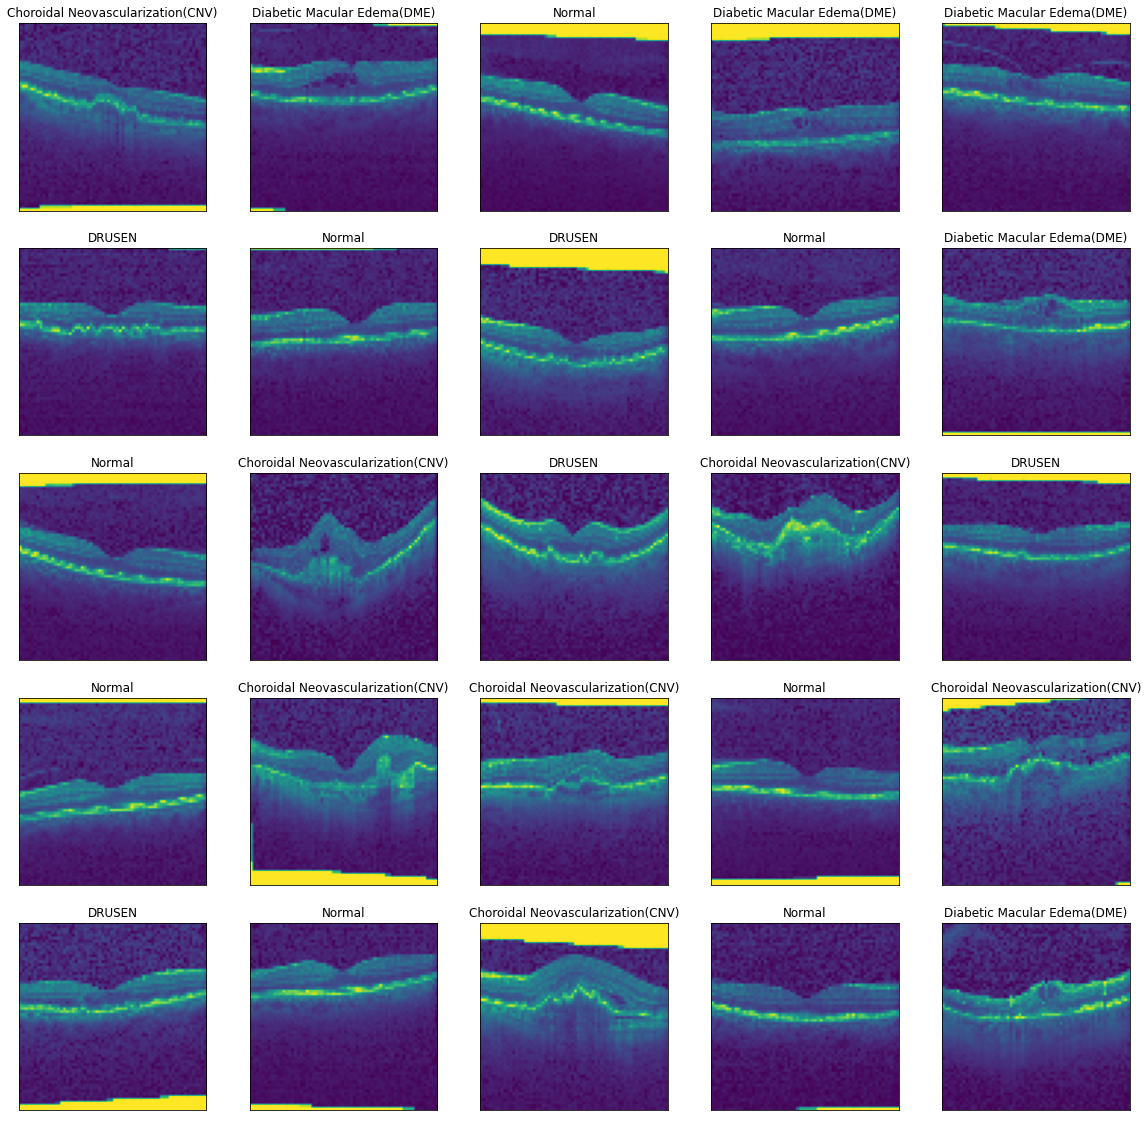

In [11]:
class_names = ['Choroidal Neovascularization(CNV)', 'Diabetic Macular Edema(DME)', 'DRUSEN', 'Normal']
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val[i].cpu().view((64, 64)))
    label_index = int(Y_val[i])
    plt.title(class_names[label_index])
plt.show()

## For Test Data: 

In [12]:
# Locations of the folders
test_CNV= '../input/kermany2018/OCT2017 /test/CNV'
test_DME= '../input/kermany2018/OCT2017 /test/DME'
test_DRUSEN= '../input/kermany2018/OCT2017 /test/DRUSEN'
test_NOR= '../input/kermany2018/OCT2017 /test/NORMAL'

In [13]:
CNV_label_imgs_test= classwise_label_img(test_CNV, 0)

DME_label_imgs_test= classwise_label_img(test_DME,1)

DRUSEN_label_imgs_test =classwise_label_img(test_DRUSEN, 2)

NORMAL_label_imgs_test =classwise_label_img(test_NOR, 3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


In [14]:
test_data= CNV_label_imgs_test + DME_label_imgs_test + DRUSEN_label_imgs_test + NORMAL_label_imgs_test

X_test, Y_test= X_Y_data_seg(test_data)

# Creating Data Loaders:

In [15]:
torch_X_train = X_train.view(-1, 1, 64, 64).float().cuda()
torch_X_test = X_test.view(-1,1, 64, 64).float().cuda()
torch_X_val = X_val.view(-1,1, 64, 64).float().cuda()
Y_train= Y_train.cuda()
Y_test= Y_test.cuda()
Y_val= Y_val.cuda()
print(torch_X_train.shape)
print(torch_X_test.shape)
print(torch_X_val.shape)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,Y_train)
test = torch.utils.data.TensorDataset(torch_X_test,Y_test)
val= torch.utils.data.TensorDataset(torch_X_val,Y_val)

# data loader

batch_size = 100

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size, shuffle = False)
val_loader = torch.utils.data.DataLoader(val, batch_size, shuffle = False)

torch.Size([83484, 1, 64, 64])
torch.Size([968, 1, 64, 64])
torch.Size([32, 1, 64, 64])


# Creating the CNN model:

In [16]:
# Forming CNN with hidden layers

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # Convolution layer 1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5) # Convolution layer 2
        
        self.fc1 = nn.Linear(in_features=12 * 13 * 13, out_features=620) # Linear layer 1 [Linear layer also called Fully Cnnected Layer]
        self.out = nn.Linear(in_features=620, out_features=4) # Linear layer 2 (output layer)
        
    def forward(self, t):
        # input layer
        t=t
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 13 * 13)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) output layer
        t = self.out(t)
        
        return t

In [17]:
# Function for calculating correct predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim= 1).eq(labels).sum().item()

In [18]:
network= Network().cuda()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2028, out_features=620, bias=True)
  (out): Linear(in_features=620, out_features=4, bias=True)
)

# Training and Validation:

In [19]:
optimizer = optim.Adam(network.parameters(), lr=0.001)

valid_loss_min = np.Inf

for epoch in range(500):
    
    train_loss = 0
    train_correct = 0
    
    val_loss = 0
    val_correct = 0

    #####TRAIN DATA SET#####
    
    for batch in train_loader: # Get Batch
  
        images, labels = batch
        preds = network(images) # Pass Batch
        loss = nn.CrossEntropyLoss()(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        train_loss += loss.item()
        train_correct += get_num_correct(preds, labels)
        

        
    #####Validation DATA SET#####
    
    for batch in val_loader: # Get Batch

        images, labels = batch
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        val_loss += loss.item()
        val_correct += get_num_correct(preds, labels)
        
    print("Epoch", epoch, " ;Total Train correct:", train_correct, " ;Train loss:", train_loss)
    print("Total Validation correct:", val_correct ," ;Validation Loss:", val_loss)
    
    
    # save model if validation loss has decreased
    if val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_loss))
        checkpoint = {'model': network,
              'state_dict': network.state_dict(),
              'optimizer' : optimizer.state_dict()}

        torch.save(checkpoint, 'checkpoint.pth')
        valid_loss_min = val_loss
        
    print('\n')

Epoch 0  ;Total Train correct: 55198  ;Train loss: 798.464122146368
Total Validation correct: 23  ;Validation Loss: 0.6323878765106201
Validation loss decreased (inf --> 0.632388).  Saving model ...




/opt/conda/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Epoch 1  ;Total Train correct: 65454  ;Train loss: 483.9431084394455
Total Validation correct: 26  ;Validation Loss: 0.5321792364120483
Validation loss decreased (0.632388 --> 0.532179).  Saving model ...


Epoch 2  ;Total Train correct: 68613  ;Train loss: 403.44045378267765
Total Validation correct: 27  ;Validation Loss: 0.5004605054855347
Validation loss decreased (0.532179 --> 0.500461).  Saving model ...


Epoch 3  ;Total Train correct: 70752  ;Train loss: 343.89836034178734
Total Validation correct: 23  ;Validation Loss: 0.723186731338501


Epoch 4  ;Total Train correct: 72839  ;Train loss: 289.66071978211403
Total Validation correct: 23  ;Validation Loss: 0.7830497622489929


Epoch 5  ;Total Train correct: 74545  ;Train loss: 246.73460240662098
Total Validation correct: 27  ;Validation Loss: 0.5802998542785645


Epoch 6  ;Total Train correct: 75455  ;Train loss: 223.04361514747143
Total Validation correct: 28  ;Validation Loss: 0.6776024103164673


Epoch 7  ;Total Train correct:

# Load the best model(with minimum validation loss):

In [20]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False
    
    model.eval()
    
    return model

In [21]:
network_best = load_checkpoint('checkpoint.pth')
network_best= network_best.cuda()
print(network_best)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=2028, out_features=620, bias=True)
  (out): Linear(in_features=620, out_features=4, bias=True)
)


In [22]:
accuracy_train= (train_correct/len(train))*100
print('Train Accuracy=' + str(accuracy_train) + '%')

Train Accuracy=99.72928944468401%


# Checking Accuracy on Test Set:

In [23]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

network_best.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = network_best(data)
    # calculate the loss
    loss = F.cross_entropy(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        continue

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 3.794782

Test Accuracy of     0: 100% (242/242)
Test Accuracy of     1: 95% (232/242)
Test Accuracy of     2: 94% (229/242)
Test Accuracy of     3: 98% (239/242)

Test Accuracy (Overall): 97% (942/968)


In [28]:
# Save the model as a pickle in a file 
import joblib
joblib.dump(network_best, 'RetinalOct.pkl')

['RetinalOct.pkl']

In [25]:
"""
    CNV - 0
    DME - 1
    DURSEN - 2
    NORMAL - 3
"""

'\n    CNV - 0\n    DME - 1\n    DURSEN - 2\n    NORMAL - 3\n'

For the above output; 
   
    Test Loss: 6.837935

    Test Accuracy of CNV(0): 100% (242/242)
    Test Accuracy of DME(1): 93% (227/242)
    Test Accuracy of DURSEN(2): 96% (233/242)
    Test Accuracy of NORMAL(3): 98% (238/242)

    Test Accuracy (Overall): 97% (940/968)